# Libraries

In [1]:
import numpy as np
import seaborn as sns
from pprint import pprint
from mlpocket.tabular import *
from mlpocket.common import *
from sklearn.model_selection import train_test_split

sns.set_style('darkgrid')

# Config

In [2]:
class Config:
    data_dir = "../data/raw/tps_aug_2022"
    label = "failure"
    output_dir = "outputs/submissions/tps_aug_2022"
    test_size = 0.33
    seed = 42

# Data

## Loading

In [3]:
_, _, train = load_data(path=f"{Config.data_dir}/train.csv", labels=[Config.label])
test = load_data(path=f"{Config.data_dir}/test.csv")

## Visualization

In [4]:
print(train.shape)
print(test.shape)

(26570, 26)
(20775, 25)


In [5]:
display(train.head())
display(test.head())

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [6]:
train.dtypes

id                  int64
product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure             int64
dtype: object

In [7]:
train.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure'],
      dtype='object')

In [8]:
train.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26570.000000,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,13284.500000,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,7670.242662,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6642.250000,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,13284.500000,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,19926.750000,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,26569.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


### NaN statistics



Printing percentage of NaN values per columns for train dataframe
id:  0.0 0/26570 columns
product_code:  0.0 0/26570 columns
loading:  0.00940910801656003 250/26570 columns
attribute_0:  0.0 0/26570 columns
attribute_1:  0.0 0/26570 columns
attribute_2:  0.0 0/26570 columns
attribute_3:  0.0 0/26570 columns
measurement_0:  0.0 0/26570 columns
measurement_1:  0.0 0/26570 columns
measurement_2:  0.0 0/26570 columns
measurement_3:  0.014339480617237487 381/26570 columns
measurement_4:  0.020248400451637186 538/26570 columns
measurement_5:  0.02544222807677832 676/26570 columns
measurement_6:  0.029958599924727138 796/26570 columns
measurement_7:  0.035265336846066996 937/26570 columns
measurement_8:  0.03944298080541964 1048/26570 columns
measurement_9:  0.046179902145276626 1227/26570 columns
measurement_10:  0.048927361686112156 1300/26570 columns
measurement_11:  0.0552502822732405 1468/26570 columns
measurement_12:  0.060255927738050434 1601/26570 columns
measurement_13:  0.0667670

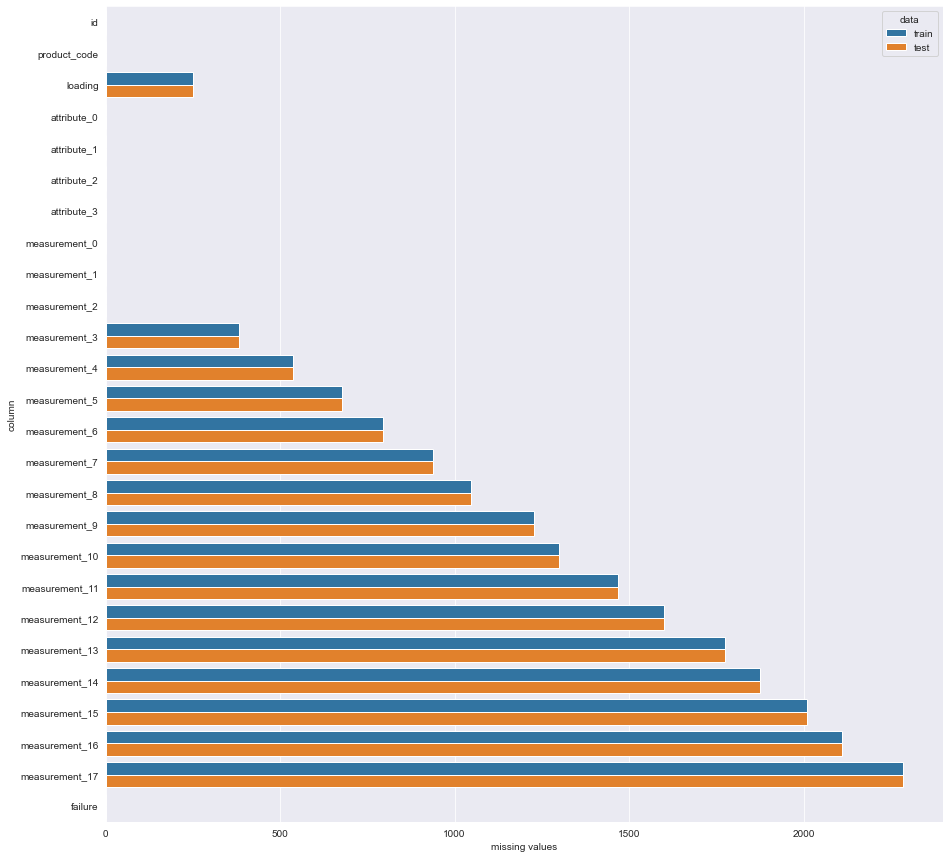

In [9]:
get_nan_stats({
    "train": train,
    "test": train
}, 
    print_nan_stats=True,
    plot_nan_stats=True
)

### Class Imbalance <span style="color: green;font-weight: bold;">(classification only)</span>

,failure,value count,percentage
0,0,20921,78.73918
1,1,5649,21.26082


<AxesSubplot:ylabel='failure'>

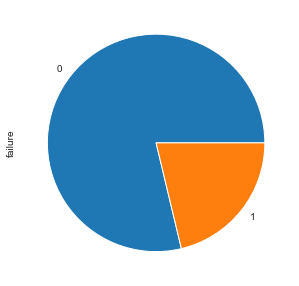

In [10]:
class_values_count = get_value_counts(train, Config.label)
display(class_values_count)
class_values_count.plot.pie(y="value count", figsize=(5,5), legend=False, ylabel=Config.label)

### Features  <span style="color: green;font-weight: bold;">(data-specific visualization)</span>

#### Product code

In [11]:
feature="product_code"

##### Who is highest?

<AxesSubplot:xlabel='count', ylabel='product_code'>

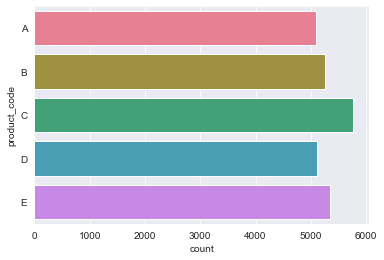

In [12]:
sns.countplot(y=feature, data=train, palette="husl")

##### Who contributes the most to the labels?

<AxesSubplot:xlabel='product_code', ylabel='count'>

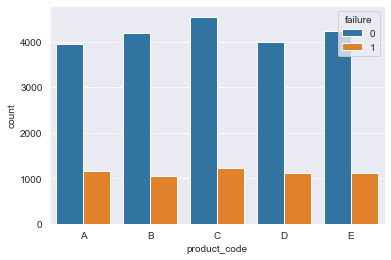

In [13]:
sns.countplot(data=train, x=feature, hue=Config.label)

##### What is the distribution of categories for each dataframe

,product_code,value count_x,train_percentage,value count_y,test_percentage
0,C,5765.0,21.697403,0.0,0.000000
1,E,5343.0,20.109146,0.0,0.000000
2,B,5250.0,19.759127,0.0,0.000000
3,D,5112.0,19.239744,0.0,0.000000
4,A,5100.0,19.194580,0.0,0.000000
5,F,0.0,0.000000,5422.0,26.098676
6,I,0.0,0.000000,5228.0,25.164862
7,G,0.0,0.000000,5107.0,24.582431
8,H,0.0,0.000000,5018.0,24.154031


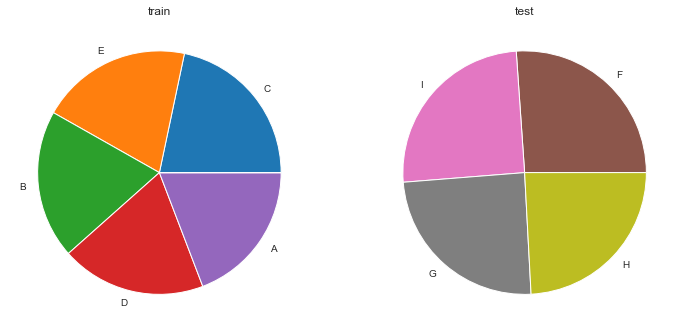

In [14]:
display(compare_value_counts({
    "train": train,
    "test": test
},
    column_name=feature
))

#### Attribrute 0

In [15]:
feature="attribute_0"

##### Who is highest?

<AxesSubplot:xlabel='count', ylabel='attribute_0'>

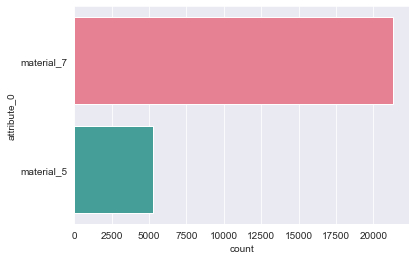

In [16]:
sns.countplot(y=feature, data=train, palette="husl")

##### Who contributes the most to the labels?

<AxesSubplot:xlabel='attribute_0', ylabel='count'>

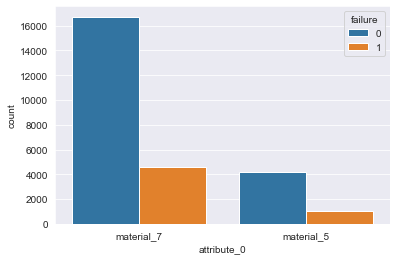

In [17]:
sns.countplot(data=train, x=feature, hue=Config.label)

##### What is the distribution of categories for each dataframe

,attribute_0,value count_x,train_percentage,value count_y,test_percentage
0,material_7,21320,80.240873,10246,49.318893
1,material_5,5250,19.759127,10529,50.681107


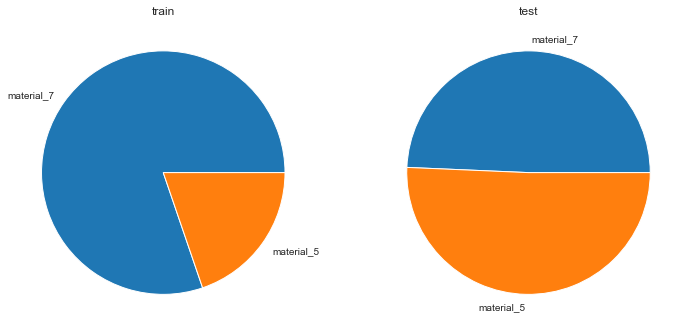

In [18]:
display(compare_value_counts({
    "train": train,
    "test": test
},
    column_name=feature
))

#### Attribute 1

In [19]:
feature="attribute_1"

##### Who is highest?

<AxesSubplot:xlabel='count', ylabel='attribute_1'>

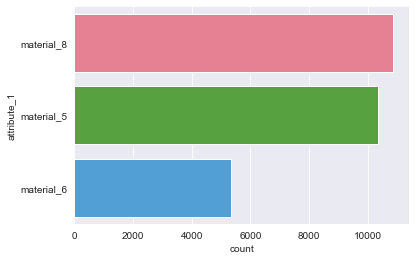

In [20]:
sns.countplot(y=feature, data=train, palette="husl")

##### Who contributes the most to the labels?

<AxesSubplot:xlabel='attribute_1', ylabel='count'>

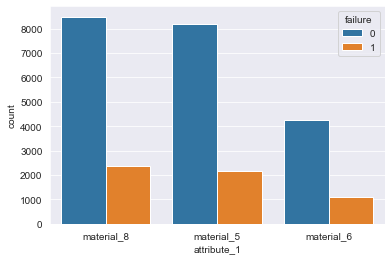

In [21]:
sns.countplot(data=train, x=feature, hue=Config.label)

##### What is the distribution of categories for each dataframe

,attribute_1,value count_x,train_percentage,value count_y,test_percentage
0,material_8,10865.0,40.891983,0.0,0.000000
1,material_5,10362.0,38.998871,5228.0,25.164862
2,material_6,5343.0,20.109146,10529.0,50.681107
3,material_7,0.0,0.000000,5018.0,24.154031


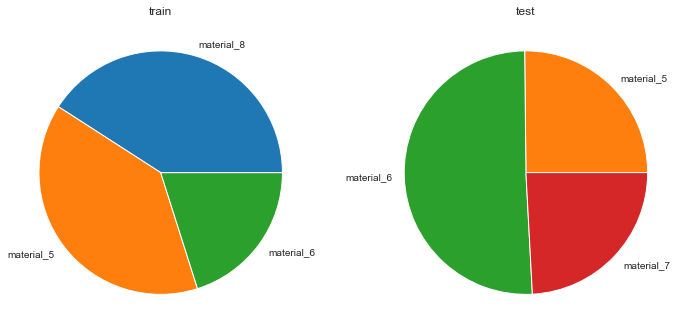

In [22]:
display(compare_value_counts({
    "train": train,
    "test": test
},
    column_name=feature
))

#### Attribute 2

In [23]:
feature="attribute_2"

##### Who is highest?

<AxesSubplot:xlabel='count', ylabel='attribute_2'>

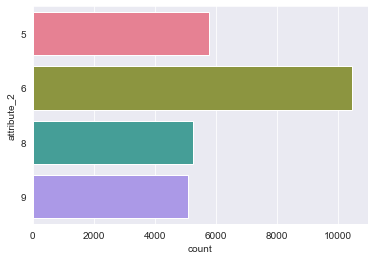

In [24]:
sns.countplot(y=feature, data=train, palette="husl")

##### Who contributes the most to the labels?

<AxesSubplot:xlabel='attribute_2', ylabel='count'>

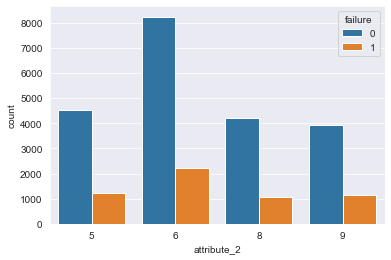

In [25]:
sns.countplot(data=train, x=feature, hue=Config.label)

##### What is the distribution of categories for each dataframe

,attribute_2,value count_x,train_percentage,value count_y,test_percentage
0,6,10455.0,39.348890,5422.0,26.098676
1,5,5765.0,21.697403,0.0,0.000000
2,8,5250.0,19.759127,0.0,0.000000
3,9,5100.0,19.194580,10335.0,49.747292
4,7,0.0,0.000000,5018.0,24.154031


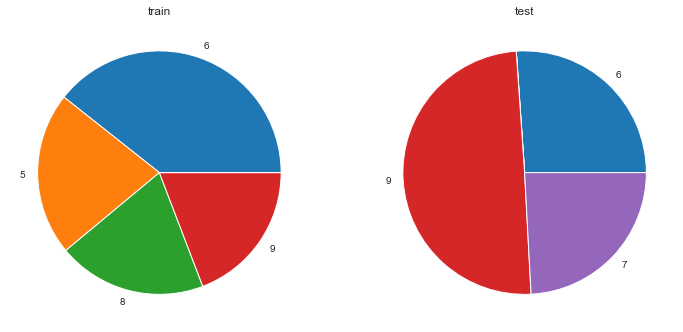

In [26]:
display(compare_value_counts({
    "train": train,
    "test": test
},
    column_name=feature
))

#### Attribute 3

In [27]:
feature="attribute_3"

##### Who is highest?

<AxesSubplot:xlabel='count', ylabel='attribute_3'>

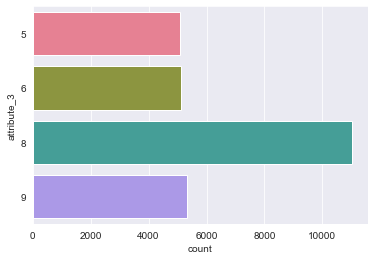

In [28]:
sns.countplot(y=feature, data=train, palette="husl")

##### Who contributes the most to the labels?

<AxesSubplot:xlabel='attribute_3', ylabel='count'>

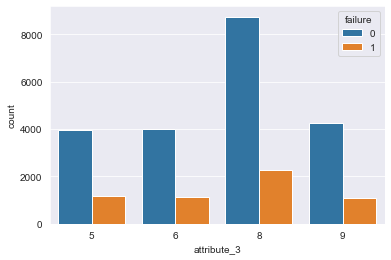

In [29]:
sns.countplot(data=train, x=feature, hue=Config.label)

##### What is the distribution of categories for each dataframe

,attribute_3,value count_x,train_percentage,value count_y,test_percentage
0,8,11015.0,41.456530,0.0,0.000000
1,9,5343.0,20.109146,5018.0,24.154031
2,6,5112.0,19.239744,0.0,0.000000
3,5,5100.0,19.194580,5228.0,25.164862
4,4,0.0,0.000000,5422.0,26.098676
5,7,0.0,0.000000,5107.0,24.582431


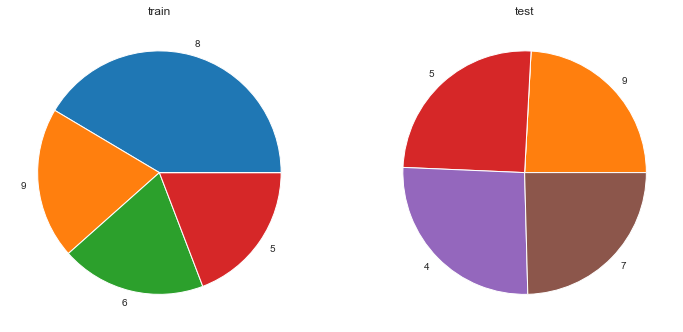

In [30]:
display(compare_value_counts({
    "train": train,
    "test": test
},
    column_name=feature
))

### Investigate category to category relationship

In [31]:
main_category = "product_code"
other_categories = ["attribute_0", "attribute_1", "attribute_2", "attribute_3"]

In [32]:
pd.concat([train,test]).groupby([main_category])[other_categories].nunique()

,attribute_0,attribute_1,attribute_2,attribute_3
product_code,,,,
A,1,1,1,1
B,1,1,1,1
C,1,1,1,1
D,1,1,1,1
E,1,1,1,1
F,1,1,1,1
G,1,1,1,1
H,1,1,1,1
I,1,1,1,1


In [33]:
# only run this if you noticed a unique combination of "other categories" for each category 
# in the categories columns. On other words, evverything is one in the previous table

pd.concat([train, test]).groupby([main_category])[other_categories].first()

,attribute_0,attribute_1,attribute_2,attribute_3
product_code,,,,
A,material_7,material_8,9,5
B,material_5,material_5,8,8
C,material_7,material_8,5,8
D,material_7,material_5,6,6
E,material_7,material_6,6,9
F,material_5,material_6,6,4
G,material_5,material_6,9,7
H,material_7,material_7,7,9
I,material_7,material_5,9,5


### Data distributions

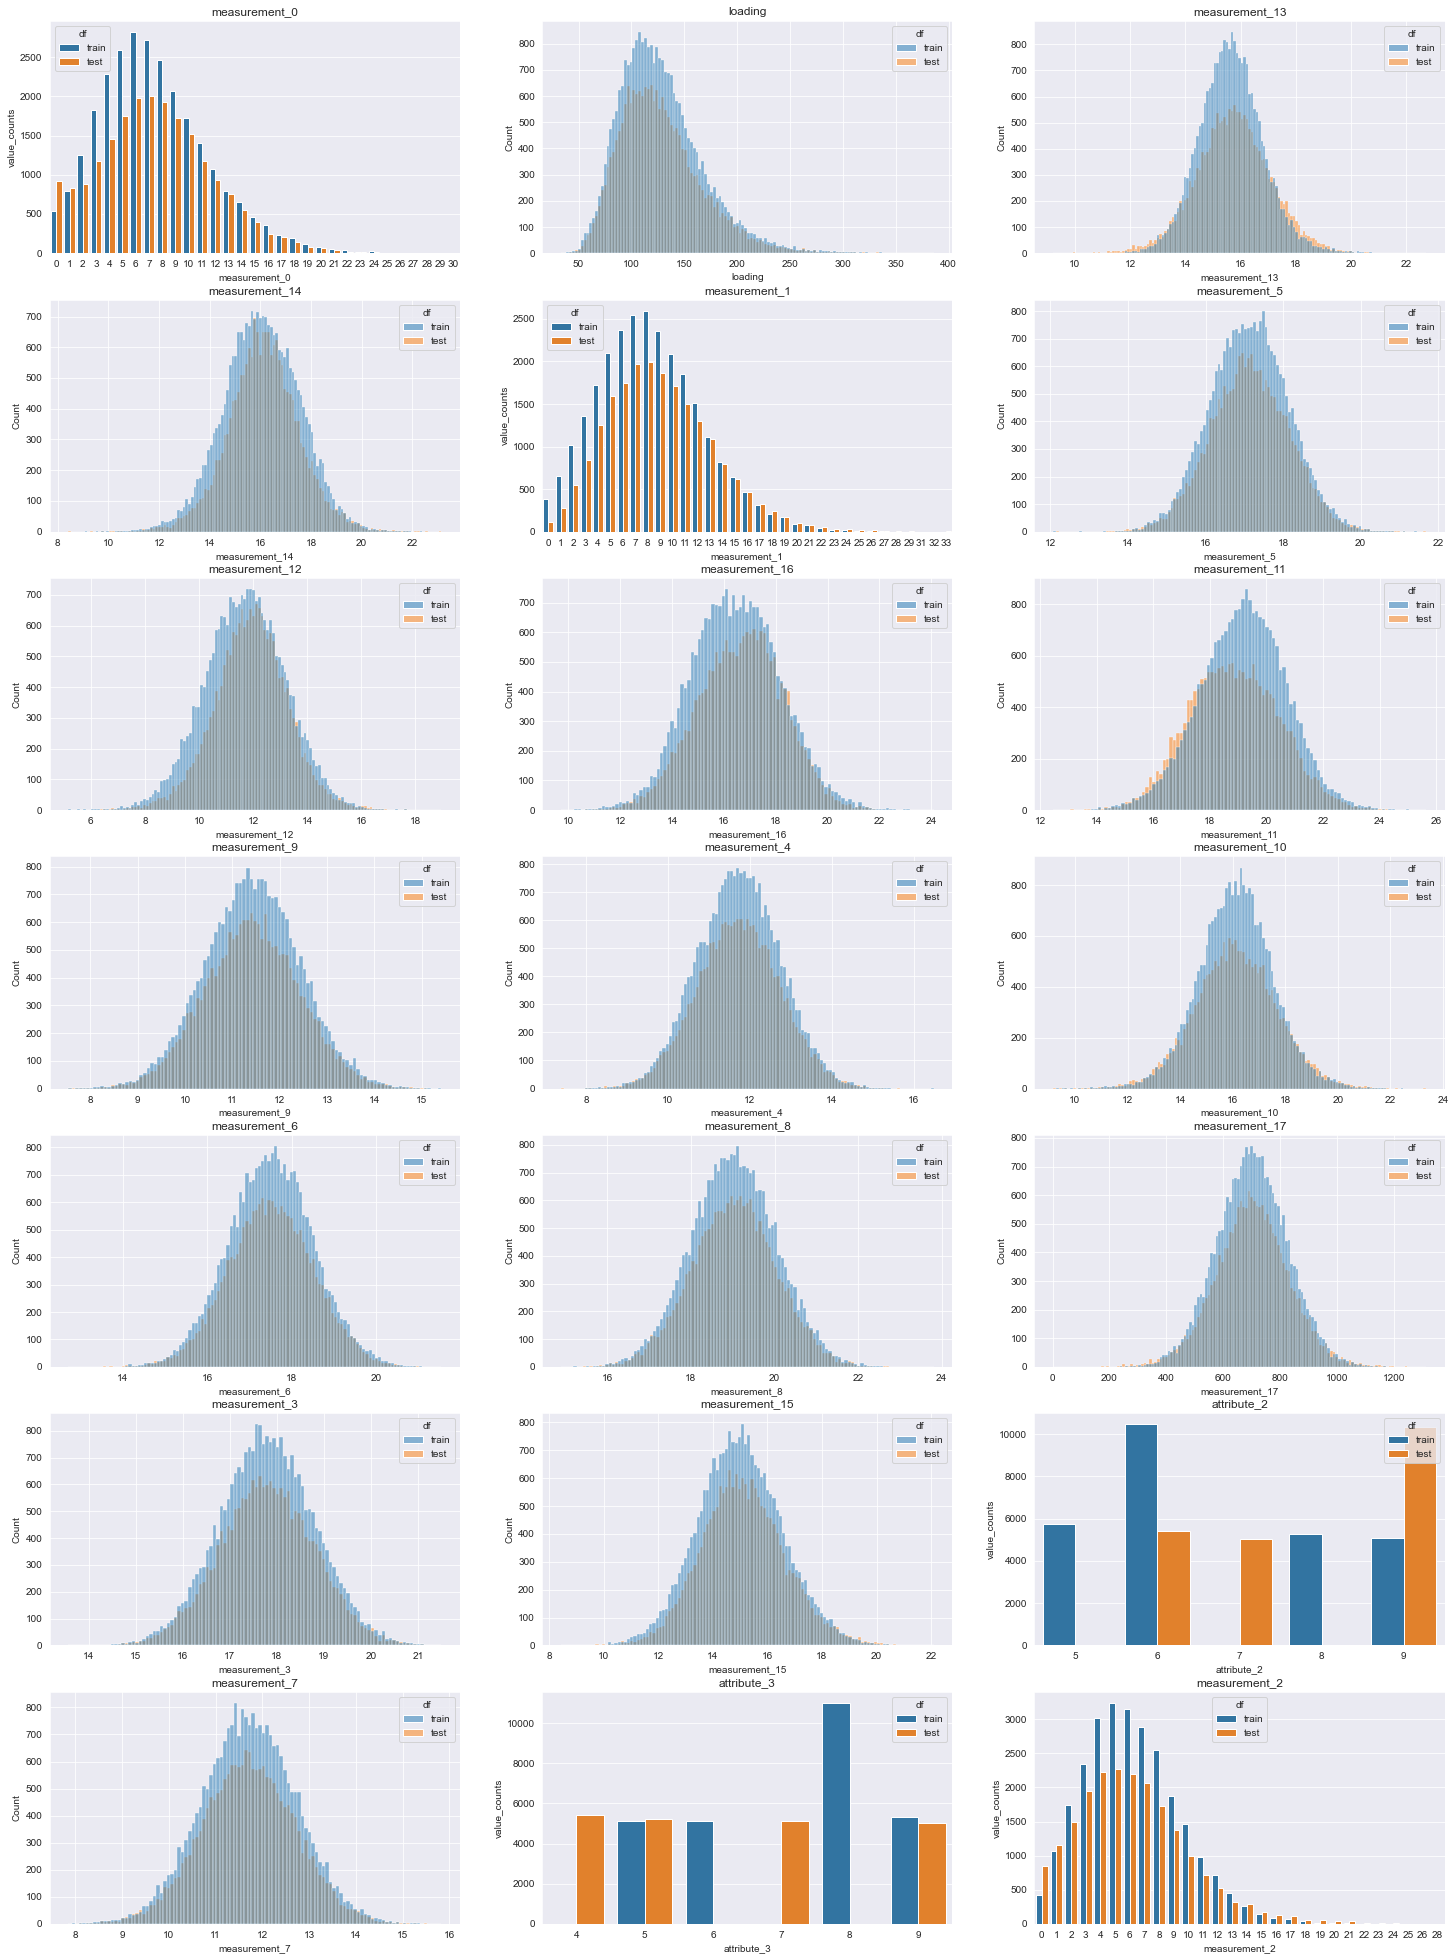

In [34]:
plot_columns_dist({
    "train": train,
    "test": test
}, 
    exclude=["id"],
    grid_size=(7, 3))

### Correlation of values

<AxesSubplot:>

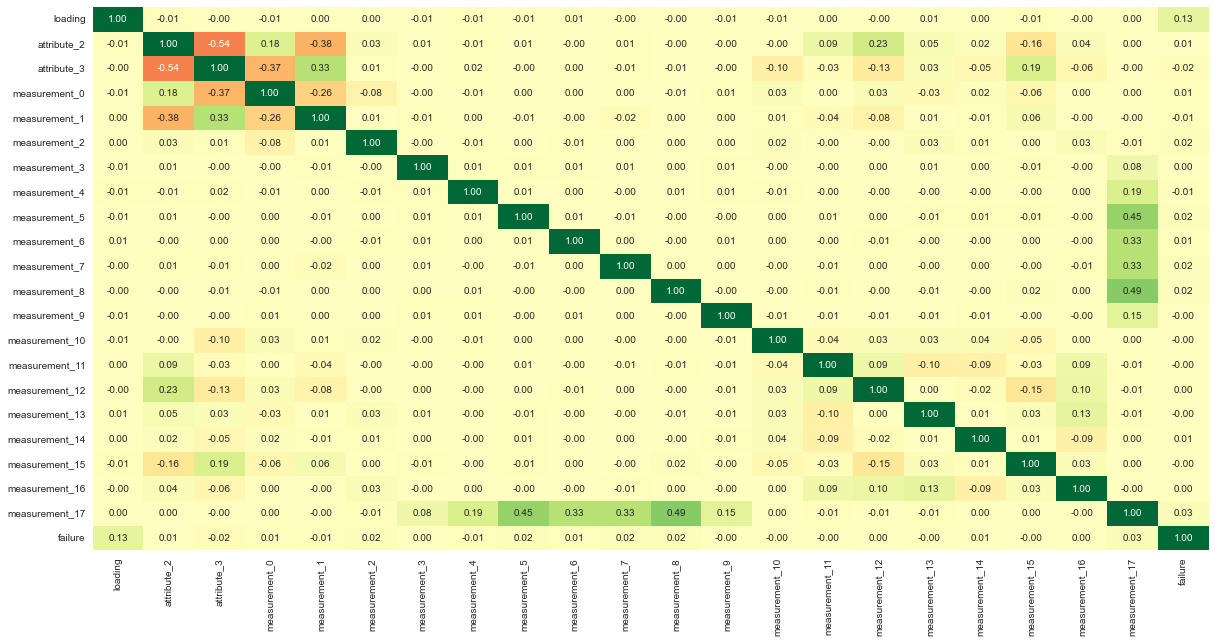

In [35]:
plot_corr(train, exclude=["id"])

### Mutual Information <span style="color: green;font-weight: bold;"> (continuous features)</span>

In [36]:
df_for_mi = train.select_dtypes(include=['float16', 'float32', 'float64']).dropna()
print(df_for_mi.columns)

mi_scores = get_mi_scores(df_for_mi, 
                          train.loc[df_for_mi.index, Config.label], 
                          df_for_mi.dtypes == int)

Index(['loading', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')


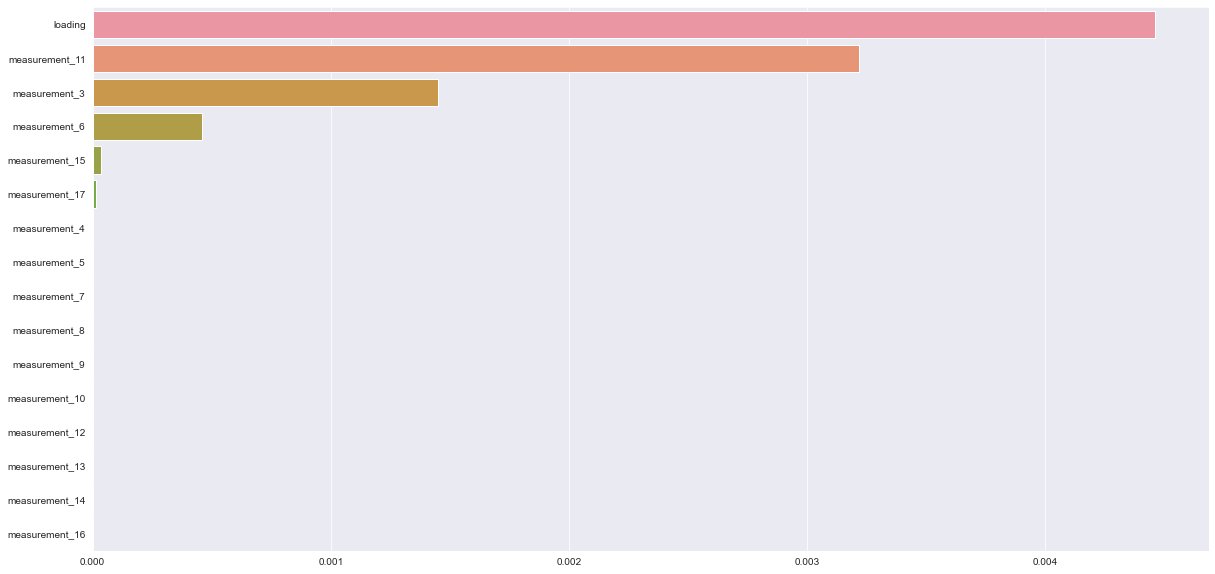

In [37]:
f,ax = plt.subplots(figsize=(20,10))
sns.barplot(y=mi_scores.index, x=mi_scores.values);

### Mean label <span style="color: green;font-weight: bold;"> (discrete features)</span>

In [38]:
features_to_include = train.select_dtypes(include=['int16', 'int32', 'int64', 'object'])\
    .drop(['id', Config.label], axis=1)\
    .columns.tolist()

features_to_include

['product_code',
 'attribute_0',
 'attribute_1',
 'attribute_2',
 'attribute_3',
 'measurement_0',
 'measurement_1',
 'measurement_2']

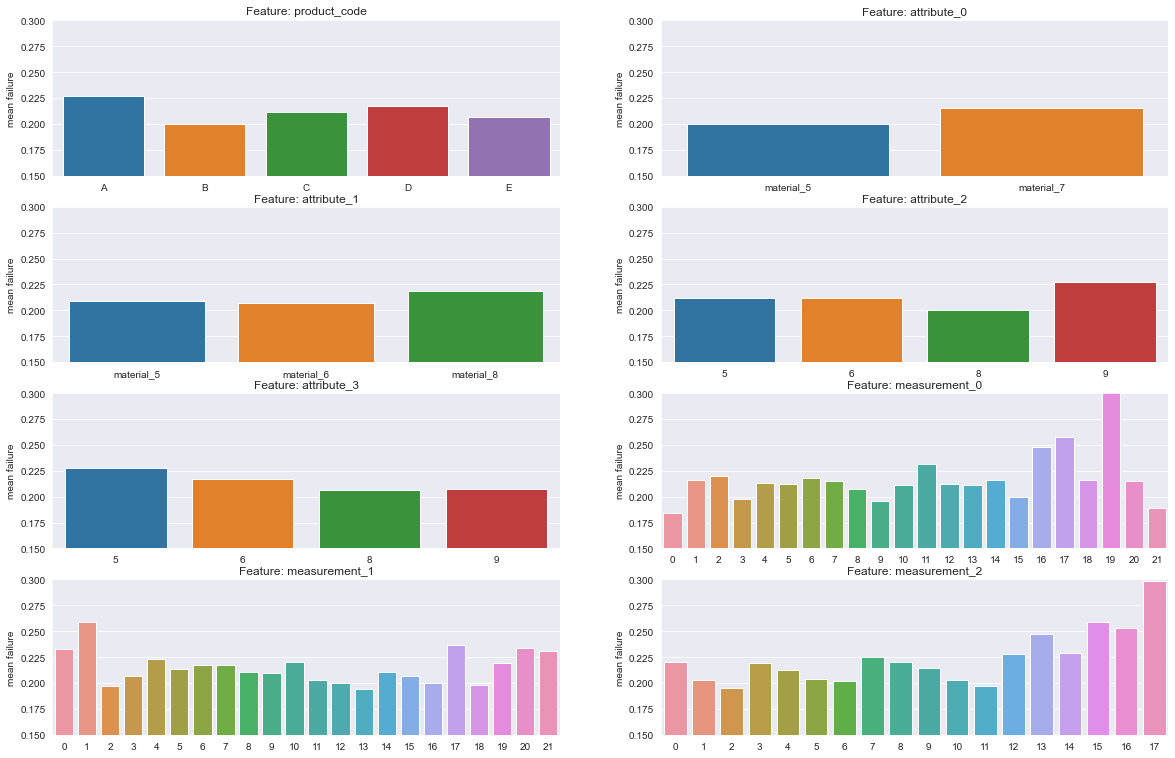

In [39]:
plot_mean_label_per_feature(
    train,
    columns=features_to_include,
    label=Config.label)

## Preprocessing

In [40]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [41]:
to_drop = set("id")

### Fill missing values

In [42]:
def fill_missing(train, val):
    train, val = train.copy(), val.copy()
    
    # write all the function to deal with missing values here, 
    # CAUTION: should retrun a dataframe!
    
    columns = list(set([f"measurement_{i}" for i in range(18)]) | set(["loading"]))
    
    #imputer = KNNImputer(n_neighbors=3)
    imputer = SimpleImputer(strategy="mean")
    imputer.fit(train[columns])
    
    train[columns] = imputer.transform(train[columns])
    val[columns] = imputer.transform(val[columns])
    
    return train, val

#### To drop if any

In [43]:
to_drop = to_drop.union([])

### Scale features

In [44]:
def scale(train, val):
    train, val = train.copy(), val.copy()
    
    # write all the function to deal with scaling
    
    columns = list(set([f"measurement_{i}" for i in range(18)]) | set(["loading"]))
    
    #scaler = StandardScaler()
    scaler = PowerTransformer()
    scaler.fit(train[columns])
    
    train[columns] = scaler.transform(train[columns])
    val[columns] = scaler.transform(val[columns])
    
    return train, val

#### To drop if any

In [45]:
to_drop = to_drop.union([])

### Categorical to Dummies

In [46]:
columns = ["product_code", "attribute_0", "attribute_1", "attribute_2", "attribute_3"]

#### To drop if any

In [47]:
to_drop = to_drop.union(columns)

### Drop Columns

In [48]:
print(to_drop)

{'product_code', 'attribute_2', 'attribute_1', 'i', 'attribute_0', 'attribute_3', 'd'}


# Modeling

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GroupKFold

In [50]:
X = train.drop(columns=Config.label)
y = train[Config.label]
X_test = test

## Baseline Algorithms

# TODO

- Modularize
- Feature to choose model
- Feature to update cv parameters
- Feature to choose cross validation strategy

In [51]:
def k_fold_cv(model, X, y):
    kfold = GroupKFold(n_splits=5)

    feature_imp, y_pred_list, y_true_list, roc_list  = [],[],[],[]
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y, train["product_code"])):
        print("===== fold", fold, "=====")
        X_train = X.loc[train_index]
        X_val = X.loc[val_index]

        y_train = y.loc[train_index]
        y_val = y.loc[val_index]
            
        #impute
        X_train, X_val = fill_missing(X_train, X_val)
            
        #scale the data
        X_train, X_val = scale(X_train, X_val)
            
        #encode categorical variables
        X_train, X_val = to_dummies(X_train, X_val, columns)

        # drop unwanted 
        X_train = drop(X_train, to_drop)
        X_val = drop(X_val, to_drop)
        
            
        # fit the model
        model.fit(X_train, y_train)
            
        #make predictions
        y_pred = model.predict_proba(X_val)[:,1]
            
        #save predictions for later
        y_pred_list = np.append(y_pred_list, y_pred)
        y_true_list = np.append(y_true_list, y_val)
        
        #evaluate performance
        roc_list.append(roc_auc_score(y_val, y_pred))
        print("roc auc", roc_auc_score(y_val, y_pred))
            
        #feature imporance
        try:
            feature_imp.append(model.feature_importances_)
        except AttributeError: # if model does not have .feature_importances_ attribute
            pass # returns empty list
    
    return feature_imp, y_pred_list, y_true_list, roc_list, X_val, y_val

### Logistic Regression

In [52]:
model = LogisticRegression(penalty='elasticnet', 
                           l1_ratio=0.8, 
                           C=0.007, 
                           tol = 1e-2, 
                           solver='saga', 
                           max_iter=3000, 
                           random_state=Config.seed)

In [53]:
%%time
feature_imp, y_pred_list, y_true_list, roc_list, X_val, y_val = k_fold_cv(model=model, X=X, y=y)

===== fold 0 =====
roc auc 0.5036043932262079
===== fold 1 =====
roc auc 0.49514161176341553
===== fold 2 =====
roc auc 0.5059749165363916
===== fold 3 =====
roc auc 0.49210948741007193
===== fold 4 =====
roc auc 0.5040273718101268
CPU times: total: 7.78 s
Wall time: 13.3 s


In [54]:
print("Mean ROC AUC Score:", np.mean(roc_list))

Mean ROC AUC Score: 0.5001715561492428


# Testing

In [55]:
def inference(model, X, X_test, iterations):
    pred_list = []
    for i in range(iterations):
        print(f"{i + 1}th iteration")
        X_train = X.sample(int(0.8*len(X)))
        y_train = y.loc[X_train.index]

        X_train, X_te = fill_missing(X_train, X_test)

        #scale the data
        X_train, X_te = scale(X_train, X_te)

        #encode categorical variables
        X_train, X_te = to_dummies(X_train, X_te, columns)
        
        # model
        model = LogisticRegression(penalty='elasticnet', 
                           l1_ratio=0.8, 
                           C=0.007, 
                           tol = 1e-2, 
                           solver='saga', 
                           max_iter=1000, 
                           random_state=i)
        
        # fit the model
        model.fit(X_train,y_train)

        #make predictions
        y_pred = model.predict_proba(X_te)[:,1]
        
        pred_list.append(y_pred)
    
    pred_df = pd.DataFrame(pred_list).T
    pred_df = pred_df.rank()
    pred_df["mean"] = pred_df.mean(axis=1)
    
    return pred_df

In [ ]:
%%time
predictions_df = inference(model, X, X_test, 20)

1th iteration
2th iteration
3th iteration
4th iteration
5th iteration
6th iteration
7th iteration
8th iteration
9th iteration
10th iteration
11th iteration
12th iteration
13th iteration
14th iteration
15th iteration
16th iteration
17th iteration
18th iteration


# Submission

In [ ]:
sub_df = pd.read_csv(f"{Config.data_dir}/sample_submission.csv")
sub_df["failure"] = predictions_df["mean"]
sub_df

In [ ]:
sub_df.to_csv(f"{get_dir(Config.output_dir)}/submission.csv", index=False)